In [1]:
import pandas as pd
import numpy as np
import os

import sys
sys.path.append('../src')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_predict, train_test_split
from sklearn.utils import shuffle
from plsr import PLSRComponents
from brokenaxes import brokenaxes

from preprocessing.dataset import DatasetSpectra

2024-12-29 08:11:11.929157: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735452671.943721   24094 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735452671.947254   24094 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10

In [4]:
file_path = '../data/dataset_681.csv'
domain_path = '../data/dataset_565_domain.csv'

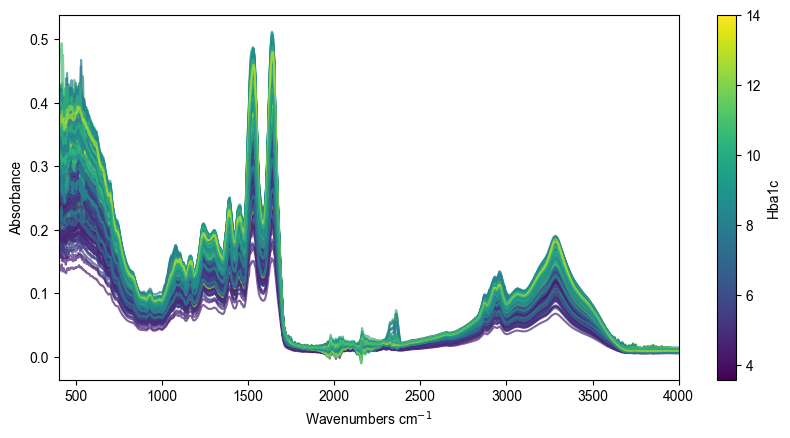

In [5]:
dataset = DatasetSpectra(file_path, domain_path)
dataset.select_max_hba1c(14)
dataset.select_region([400, 4000])
dataset.drop_samples([287, 636])
fig1, ax1 = dataset.plot_spectra()
plt.subplots_adjust(bottom=0.15)
plt.savefig('../figures/spectra_before_preproc.png', dpi=300, transparent=True)

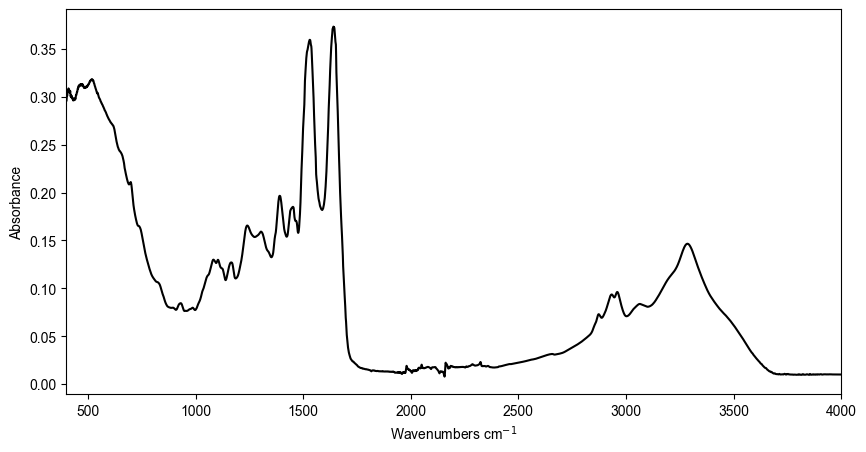

In [6]:
plt.figure(figsize=(10, 5))

spectra = dataset.spectra.mean(axis=0)
wn = dataset.wavenumbers
plt.plot(wn, spectra, color='k')
plt.xlabel("Wavenumbers cm$^{-1}$")
plt.ylabel("Absorbance")
plt.xlim([400, 4000])
plt.savefig('../figures/mean_spectra_before.png', dpi=300, transparent=True)

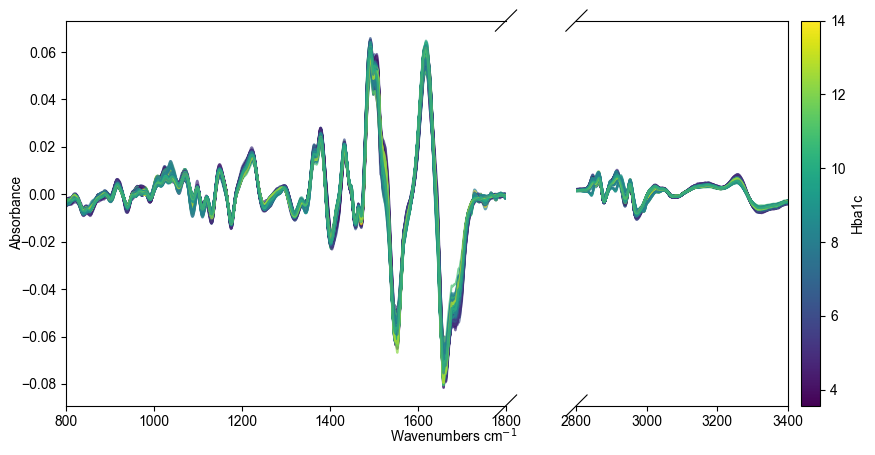

In [7]:
# dataset.baseline_corr()
dataset.savgol_filter(window_length=32, polyorder=2, deriv=1)
dataset.normalization('vector')
dataset.select_region([[800, 1800], [2800, 3400]])
# dataset.select_region([800, 1800])
fig2, ax2 = dataset.plot_spectra()
plt.savefig('../figures/spectra_after_preproc.png', dpi=300, transparent=True)